In [1]:
from keras.models import Model
from keras.layers import Flatten,Dense
from keras.applications.vgg16 import VGG16


2026-01-04 10:47:20.318964: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767552442.318602     763 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767552442.888938     763 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767552447.584829     763 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767552447.584862     763 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767552447.584864     763 computation_placer.cc:177] computation placer alr

In [2]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
import matplotlib.pyplot as plot
from glob import glob

In [4]:
IMAGESHAPE = [224, 224, 3] 
# E:\projects\cxr-pna-toy\data\archive\chest_xray\test
training_data = '//data//archive//chest_xray//train'
testing_data = '//data//archive//chest_xray//test'

In [5]:
vgg_model = VGG16(input_shape=IMAGESHAPE, weights='imagenet', include_top=False)

I0000 00:00:1767552548.930266     763 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5562 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070, pci bus id: 0000:1f:00.0, compute capability: 8.6


In [6]:
for each_layer in vgg_model.layers:
    each_layer.trainable = False

In [7]:
classes = glob('.//data//archive//chest_xray//train//*')

In [8]:
len(classes)

2

In [214]:
flatten_layer = Flatten()(vgg_model.output)
prediction = Dense(len(classes), activation='softmax')(flatten_layer)

In [215]:
final_model = Model(inputs=vgg_model.input, outputs=prediction) 
final_model.summary()

Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │        50,178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,764,866 (56.32 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [216]:
final_model.compile( 
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [217]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
								shear_range = 0.2,
								zoom_range = 0.2,
								horizontal_flip = True)
testing_datagen = ImageDataGenerator(rescale =1. / 255)

# This code is modified by Susobhan Akhuli

In [218]:
# classes = glob('.//data//archive//chest_xray//train//NORMAL//*')
training_set = train_datagen.flow_from_directory('.//data//archive//chest_xray//train//', 
                                                 target_size = (224, 224),
                                                 batch_size = 4,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [219]:
training_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [220]:
test_set = testing_datagen.flow_from_directory('.//data//archive//chest_xray//test',
                                               target_size = (224, 224),
                                               batch_size = 4,
                                               class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [221]:
fitted_model = final_model.fit(
    training_set,
    validation_data=test_set,
    epochs=5,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

# This code is modified by Susobhan Akhuli

Epoch 1/5
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 165s 125ms/step - accuracy: 0.9273 - loss: 0.2701 - val_accuracy: 0.8766 - val_loss: 0.5718
Epoch 2/5
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 109s 84ms/step - accuracy: 0.9427 - loss: 0.2763 - val_accuracy: 0.7356 - val_loss: 2.3070
Epoch 3/5
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 108s 83ms/step - accuracy: 0.9505 - loss: 0.2523 - val_accuracy: 0.8910 - val_loss: 1.0009
Epoch 4/5
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 119s 91ms/step - accuracy: 0.9584 - loss: 0.2177 - val_accuracy: 0.9103 - val_loss: 0.6267
Epoch 5/5
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 117s 90ms/step - accuracy: 0.9620 - loss: 0.1993 - val_accuracy: 0.8670 - val_loss: 1.2632


In [222]:
final_model.save('final_model2.h5')

In [ ]:
# "E:\projects\cxr-pna-toy\data\archive\chest_xray\test\PNEUMONIA\person85_bacteria_417.jpeg"

In [275]:
img_path = ".//data//archive//chest_xray//test//PNEUMONIA//person85_bacteria_417.jpeg"

In [276]:
# E:\projects\cxr-pna-toy\data\archive\chest_xray\test\PNEUMONIA

In [277]:
from keras.preprocessing import image
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
import numpy as np
model=load_model('final_model.h5') #Loading our model
img = image.load_img(img_path,target_size=(224,224))
imagee=image.img_to_array(img) #Converting the X-Ray into pixels
imagee=np.expand_dims(imagee, axis=0)
img_data=preprocess_input(imagee)
prediction=model.predict(img_data)
if prediction[0][0]>prediction[0][1]: #Printing the prediction of model.
	print('Person is safe.')
else:
	print('Person is affected with Pneumonia.')
print(f'Predictions: {prediction}')

# This code is modified by Susobhan Akhuli

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Person is affected with Pneumonia.
Predictions: [[0. 1.]]


In [185]:
def check_tensor(name, t):
    if t is None:
        print(f"{name}: NONE")
        return

    t_np = t.numpy() if hasattr(t, "numpy") else t
    print(
        f"{name}: "
        f"shape={t_np.shape}, "
        f"min={t_np.min():.5f}, "
        f"max={t_np.max():.5f}, "
        f"nan={np.isnan(t_np).any()}, "
        f"inf={np.isinf(t_np).any()}"
    )


In [255]:
def make_gradcam_heatmap(img_array, model, grad_model, class_index=None):
    # print("\n--- FORWARD PASS ---")
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        # check_tensor("conv_outputs", conv_outputs)
        # check_tensor("predictions", predictions)
        # Right after getting conv_outputs in your gradcam function:
        conv_outputs_np = conv_outputs[0].numpy()
        print(f"Conv outputs shape: {conv_outputs_np.shape}")
        
        # Visualize a few feature maps
        fig, axes = plt.subplots(2, 4, figsize=(12, 6))
        for i in range(8):
            ax = axes[i//4, i%4]
            ax.imshow(conv_outputs_np[:, :, i*64], cmap='viridis')
            ax.set_title(f'Feature {i*64}')
            ax.axis('off')
        plt.savefig('feature_maps.png')
        
        if class_index is None:
            class_index = tf.argmax(predictions[0])
            # print("selected class_index:", int(class_index))

        class_channel = predictions[:, class_index]
        # check_tensor("class_channel", class_channel)

    # print("\n--- BACKWARD PASS ---")

    grads = tape.gradient(class_channel, conv_outputs)
    # After fixing the gradient issue, print this:
    print(f"Gradients flowing? min={grads.numpy().min()}, max={grads.numpy().max()}")

    # Visualize multiple samples from BOTH classes
    # Does class 0 highlight lungs but class 1 highlights axilla?
    # check_tensor("grads", grads)
    if grads is None:
        raise RuntimeError("Gradients are None. Wrong layer or no gradient flow.")

    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    # check_tensor("pooled_grads", pooled_grads)

    conv_outputs = conv_outputs[0]
    # check_tensor("conv_outputs[0]", conv_outputs)

    heatmap = tf.reduce_sum(conv_outputs * pooled_grads, axis=-1)
    # check_tensor("raw heatmap", heatmap)
    
    heatmap = tf.maximum(heatmap, 0)
    # check_tensor("relu heatmap", heatmap)

    max_val = tf.reduce_max(heatmap)
    # check_tensor("heatmap max", max_val)

    heatmap = tf.where(
        max_val > 0,
        heatmap / max_val,
        tf.zeros_like(heatmap)
    )
    # check_tensor("normalized heatmap", heatmap)

    return heatmap.numpy()


In [256]:
last_conv_layer_name = "block5_conv3"  # shape (28,28,512)

In [284]:
flatten_output = model.get_layer('flatten_2').output
logits_layer = tf.keras.layers.Dense(2, activation=None, name='logits')
logits = logits_layer(flatten_output)

In [285]:
from tensorflow.keras import Model, Input

x = grad_model = Model(
    inputs=model.input,
    outputs=[model.get_layer(last_conv_layer_name).output, logits]
)



In [286]:
grad_model.get_layer('logits').set_weights(model.get_layer('dense_7').get_weights())


Conv outputs shape: (14, 14, 512)
Gradients flowing? min=-0.3411584496498108, max=0.34094300866127014


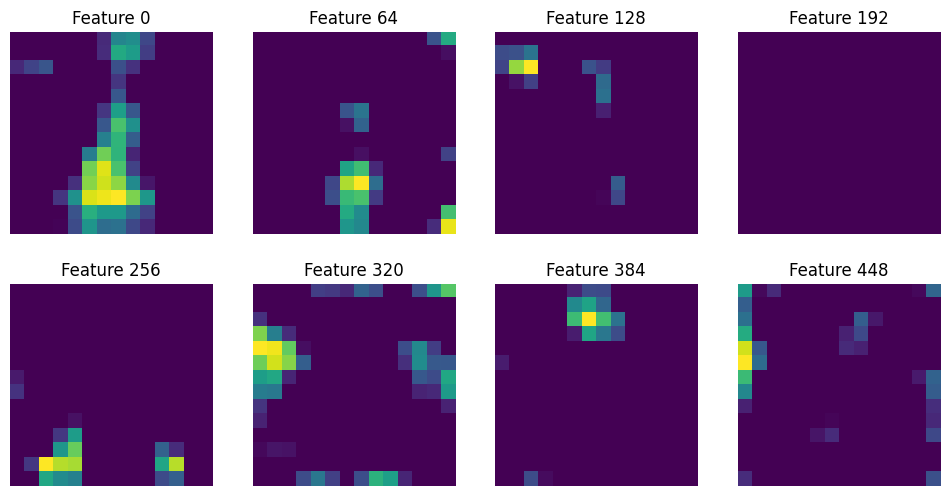

In [287]:
heatmap = make_gradcam_heatmap(img_data, model, grad_model)


In [288]:
# After getting heatmap
print(f"Heatmap shape: {heatmap.shape}")
print(f"Heatmap min: {heatmap.min():.4f}, max: {heatmap.max():.4f}")
print(f"Heatmap mean: {heatmap.mean():.4f}, std: {heatmap.std():.4f}")
print(f"Non-zero percentage: {(heatmap > 0.1).sum() / heatmap.size * 100:.2f}%")

Heatmap shape: (14, 14)
Heatmap min: 0.0000, max: 1.0000
Heatmap mean: 0.1530, std: 0.1758
Non-zero percentage: 51.02%


In [289]:
save_gradcam_overlay(img_path, heatmap, f"./analysis/")

Image shape: (224, 224, 3)
Heatmap shape before resize: (14, 14)
Heatmap shape after resize: (224, 224)


In [261]:
import cv2

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

heatmap_resized = cv2.resize(heatmap, (224, 224))
heatmap_uint8 = np.uint8(255 * heatmap_resized)
heatmap_colored = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)
overlay = cv2.addWeighted(img, 0.6, heatmap_colored, 0.4, 0)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
overlay_rgb = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)


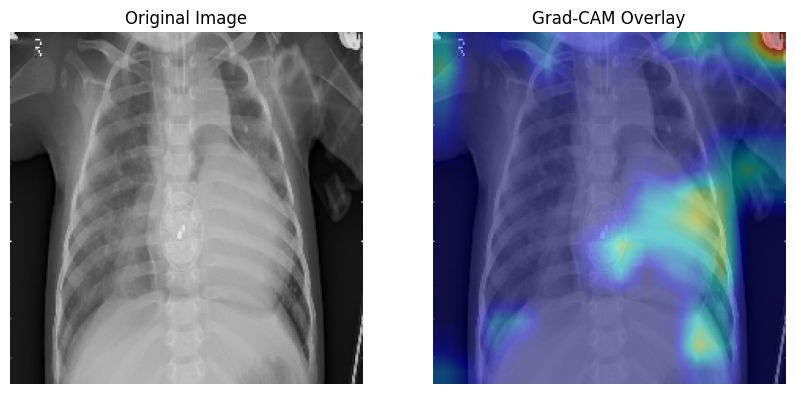

In [262]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(overlay_rgb)
plt.title("Grad-CAM Overlay")
plt.axis("off")

plt.show()

In [253]:
# Check BOTH classes - this is critical
import numpy as np
import matplotlib.pyplot as plt

def analyze_model_focus(model, grad_model, test_dir):
    """Analyze what the model focuses on for both classes"""
    
    from tensorflow.keras.preprocessing import image
    import os
    
    for class_name in ['NORMAL', 'PNEUMONIA']:
        class_path = os.path.join(test_dir, class_name)
        images = os.listdir(class_path)[:5]  # First 5 images
        
        print(f"\n{'='*50}")
        print(f"Class: {class_name}")
        print(f"{'='*50}")
        
        for img_name in images:
            img_path = os.path.join(class_path, img_name)
            
            # Load and preprocess
            img = image.load_img(img_path, target_size=(224, 224))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = img_array / 255.0
            
            # Predict
            pred = model.predict(img_array, verbose=0)
            pred_class = np.argmax(pred[0])
            confidence = pred[0][pred_class]
            
            # Generate heatmap
            heatmap = make_gradcam_heatmap(img_array, model, grad_model, class_index=pred_class)
            
            print(f"{img_name}: Pred={pred_class} ({'NORMAL' if pred_class==0 else 'PNEUMONIA'}), Conf={confidence:.3f}")
            
            # Optional: save overlay to inspect visually
            save_gradcam_overlay(img_path, heatmap, f"./analysis/analysis_{class_name}_{img_name}")

# Run analysis


In [254]:
analyze_model_focus(model, grad_model, './data/archive/chest_xray/test')


Class: NORMAL
Gradients flowing? min=-0.015463942661881447, max=0.015463301911950111
IM-0001-0001.jpeg: Pred=0 (NORMAL), Conf=1.000
Image shape: (224, 224, 3)
Heatmap shape before resize: (14, 14)
Heatmap shape after resize: (224, 224)
Gradients flowing? min=-0.015463942661881447, max=0.015463301911950111
IM-0003-0001.jpeg: Pred=0 (NORMAL), Conf=1.000
Image shape: (224, 224, 3)
Heatmap shape before resize: (14, 14)
Heatmap shape after resize: (224, 224)
Gradients flowing? min=-0.015463942661881447, max=0.015463301911950111
IM-0005-0001.jpeg: Pred=0 (NORMAL), Conf=1.000
Image shape: (224, 224, 3)
Heatmap shape before resize: (14, 14)
Heatmap shape after resize: (224, 224)
Gradients flowing? min=-0.015463942661881447, max=0.015463301911950111
IM-0006-0001.jpeg: Pred=0 (NORMAL), Conf=0.932
Image shape: (224, 224, 3)
Heatmap shape before resize: (14, 14)
Heatmap shape after resize: (224, 224)
Gradients flowing? min=-0.015463942661881447, max=0.015463301911950111
IM-0007-0001.jpeg: Pred=0 

In [232]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def save_gradcam_overlay(img_path, heatmap, save_path, alpha=0.4):
    """
    Create and save Grad-CAM overlay
    
    Args:
        img_path: Path to original image
        heatmap: Grad-CAM heatmap (14x14 for VGG16)
        save_path: Where to save the overlay
        alpha: Transparency of heatmap overlay (0-1)
    """
    # Load original image
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    
    # Rescale heatmap to image size
    heatmap = cv2.resize(heatmap, (224, 224))
    
    # Convert heatmap to RGB (jet colormap)
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
    
    # Overlay heatmap on original image
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype('uint8')
    
    # Create figure with original, heatmap, and overlay
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    axes[0].imshow(img.astype('uint8'))
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    axes[1].imshow(heatmap)
    axes[1].set_title('Grad-CAM Heatmap')
    axes[1].axis('off')
    
    axes[2].imshow(superimposed_img)
    axes[2].set_title('Overlay')
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.savefig(save_path, dpi=150, bbox_inches='tight')
    plt.close()
    
    print(f"Saved overlay to: {save_path}")

In [273]:
def save_gradcam_overlay(img_path, heatmap, save_path, alpha=0.4):
    """
    Create and save Grad-CAM overlay with alignment checks
    """
    # Load original image THE SAME WAY as training
    from tensorflow.keras.preprocessing import image as keras_image
    img = keras_image.load_img(img_path, target_size=(224, 224))
    img_array = keras_image.img_to_array(img)
    
    print(f"Image shape: {img_array.shape}")
    print(f"Heatmap shape before resize: {heatmap.shape}")
    
    # Resize heatmap to match image
    heatmap_resized = cv2.resize(heatmap, (224, 224))
    print(f"Heatmap shape after resize: {heatmap_resized.shape}")
    
    # Convert heatmap to RGB
    heatmap_uint8 = np.uint8(255 * heatmap_resized)
    heatmap_colored = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)
    
    # CRITICAL: OpenCV uses BGR, convert to RGB
    heatmap_colored = cv2.cvtColor(heatmap_colored, cv2.COLOR_BGR2RGB)
    
    # Overlay
    superimposed = heatmap_colored * alpha + img_array * (1 - alpha)
    superimposed = np.clip(superimposed, 0, 255).astype('uint8')
    
    # Visualize with grid for alignment check
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    
    axes[0].imshow(img_array.astype('uint8'))
    axes[0].set_title('Original')
    axes[0].grid(True, alpha=0.3)
    axes[0].axis('on')
    
    axes[1].imshow(heatmap_resized, cmap='jet')
    axes[1].set_title('Heatmap (raw)')
    axes[1].grid(True, alpha=0.3)
    axes[1].axis('on')
    
    axes[2].imshow(heatmap_colored)
    axes[2].set_title('Heatmap (colored)')
    axes[2].grid(True, alpha=0.3)
    axes[2].axis('on')
    
    axes[3].imshow(superimposed)
    axes[3].set_title('Overlay')
    axes[3].grid(True, alpha=0.3)
    axes[3].axis('on')
    
    plt.tight_layout()
    plt.savefig(save_path, dpi=150, bbox_inches='tight')
    plt.close()